In [3]:
!pip install shapely
!pip install scikit-learn==1.5.0


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 77.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 41.6 MB/s eta 0:00:00:00:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.1
    Uninstalling scikit-learn-1.5.1:
      Successfully uninstalled scikit-learn-1.5.1


In [4]:
import os
import json
import numpy as np
import pandas as pd
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.stats import gaussian_kde
os.sys.path.append('../')
os.sys.path.append('../../evaluation/')
from lib import remove_outliers

model_path = '../../modeling/2d/'
ris_path = '../data/leeds_ris.json'
ris = json.load(open(ris_path, 'r'))
log_analytes = 'all'


In [15]:
def plot_distributions_and_ris(df, ris, transform=False, gender=None, outlier_removal=False):
    
    colors = ['blue', 'salmon'] # colors for male and female densities
    linestyles = ['-', '--'] # linestyles for male and female RIs

    # get list of analytes
    analytes = df.columns[3:]
        
    n = len(analytes)
    plt.figure(figsize=(10, 2*n//2+1), dpi=300)
    for i in range(n):
        plt.subplot(n//2+1,2,i+1)
        
        # get data and labels
        dfp = df.dropna(subset=analytes[i]) # drop NA
        if gender is not None:
            dfp = dfp[dfp.gender==gender]
        data = dfp[analytes[i]].values
        labels = dfp.label.values
                        
        # remove outliers
        if outlier_removal:
            outliers = remove_outliers(data[..., np.newaxis])
            data = data[~outliers]
            labels = labels[~outliers]
                    
        # maybe transform
        if transform:
            if (log_analytes=='all') or (analytes[i] in log_analytes):
#                 data, _ = boxcox(data)
                data = np.log(data)
            data = np.array(data)[..., np.newaxis]
        
        # formatting
        if transform & ((analytes[i] in log_analytes) or log_analytes=='all'):
            xlabel = ' (Log-'+ris[analytes[i]]['unit']+')'
            x_range = np.linspace(data.mean()-4*data.std(), data.mean()+4*data.std(), 50)
        else:
            xlabel = ' ('+ris[analytes[i]]['unit']+')'
            x_range = np.linspace(np.max([0, data.mean()-4*data.std()]), data.mean()+4*data.std(), 50)

        # histogram
        plt.hist(data[labels=='reference'], x_range, density=False, edgecolor='k', color='dodgerblue', alpha=0.2, label='Healthy')
        plt.hist(data[labels=='abnormal'], x_range, density=False, edgecolor='k', color='yellow', alpha=0.2, label='Abnormal')
        plt.hist(data[[i in ['hepatitis', 'fibrosis', 'cirrhosis'] for i in labels]], x_range, density=False, edgecolor='k', color='red', alpha=0.2, label='HCV-positive')
                    
        # title and formatting
        plt.title(analytes[i].capitalize())
        plt.xlabel(xlabel, labelpad=0)
        plt.yticks([])
        
        if i==0:
            plt.legend()
            plt.ylabel('Counts')

    plt.tight_layout();
    

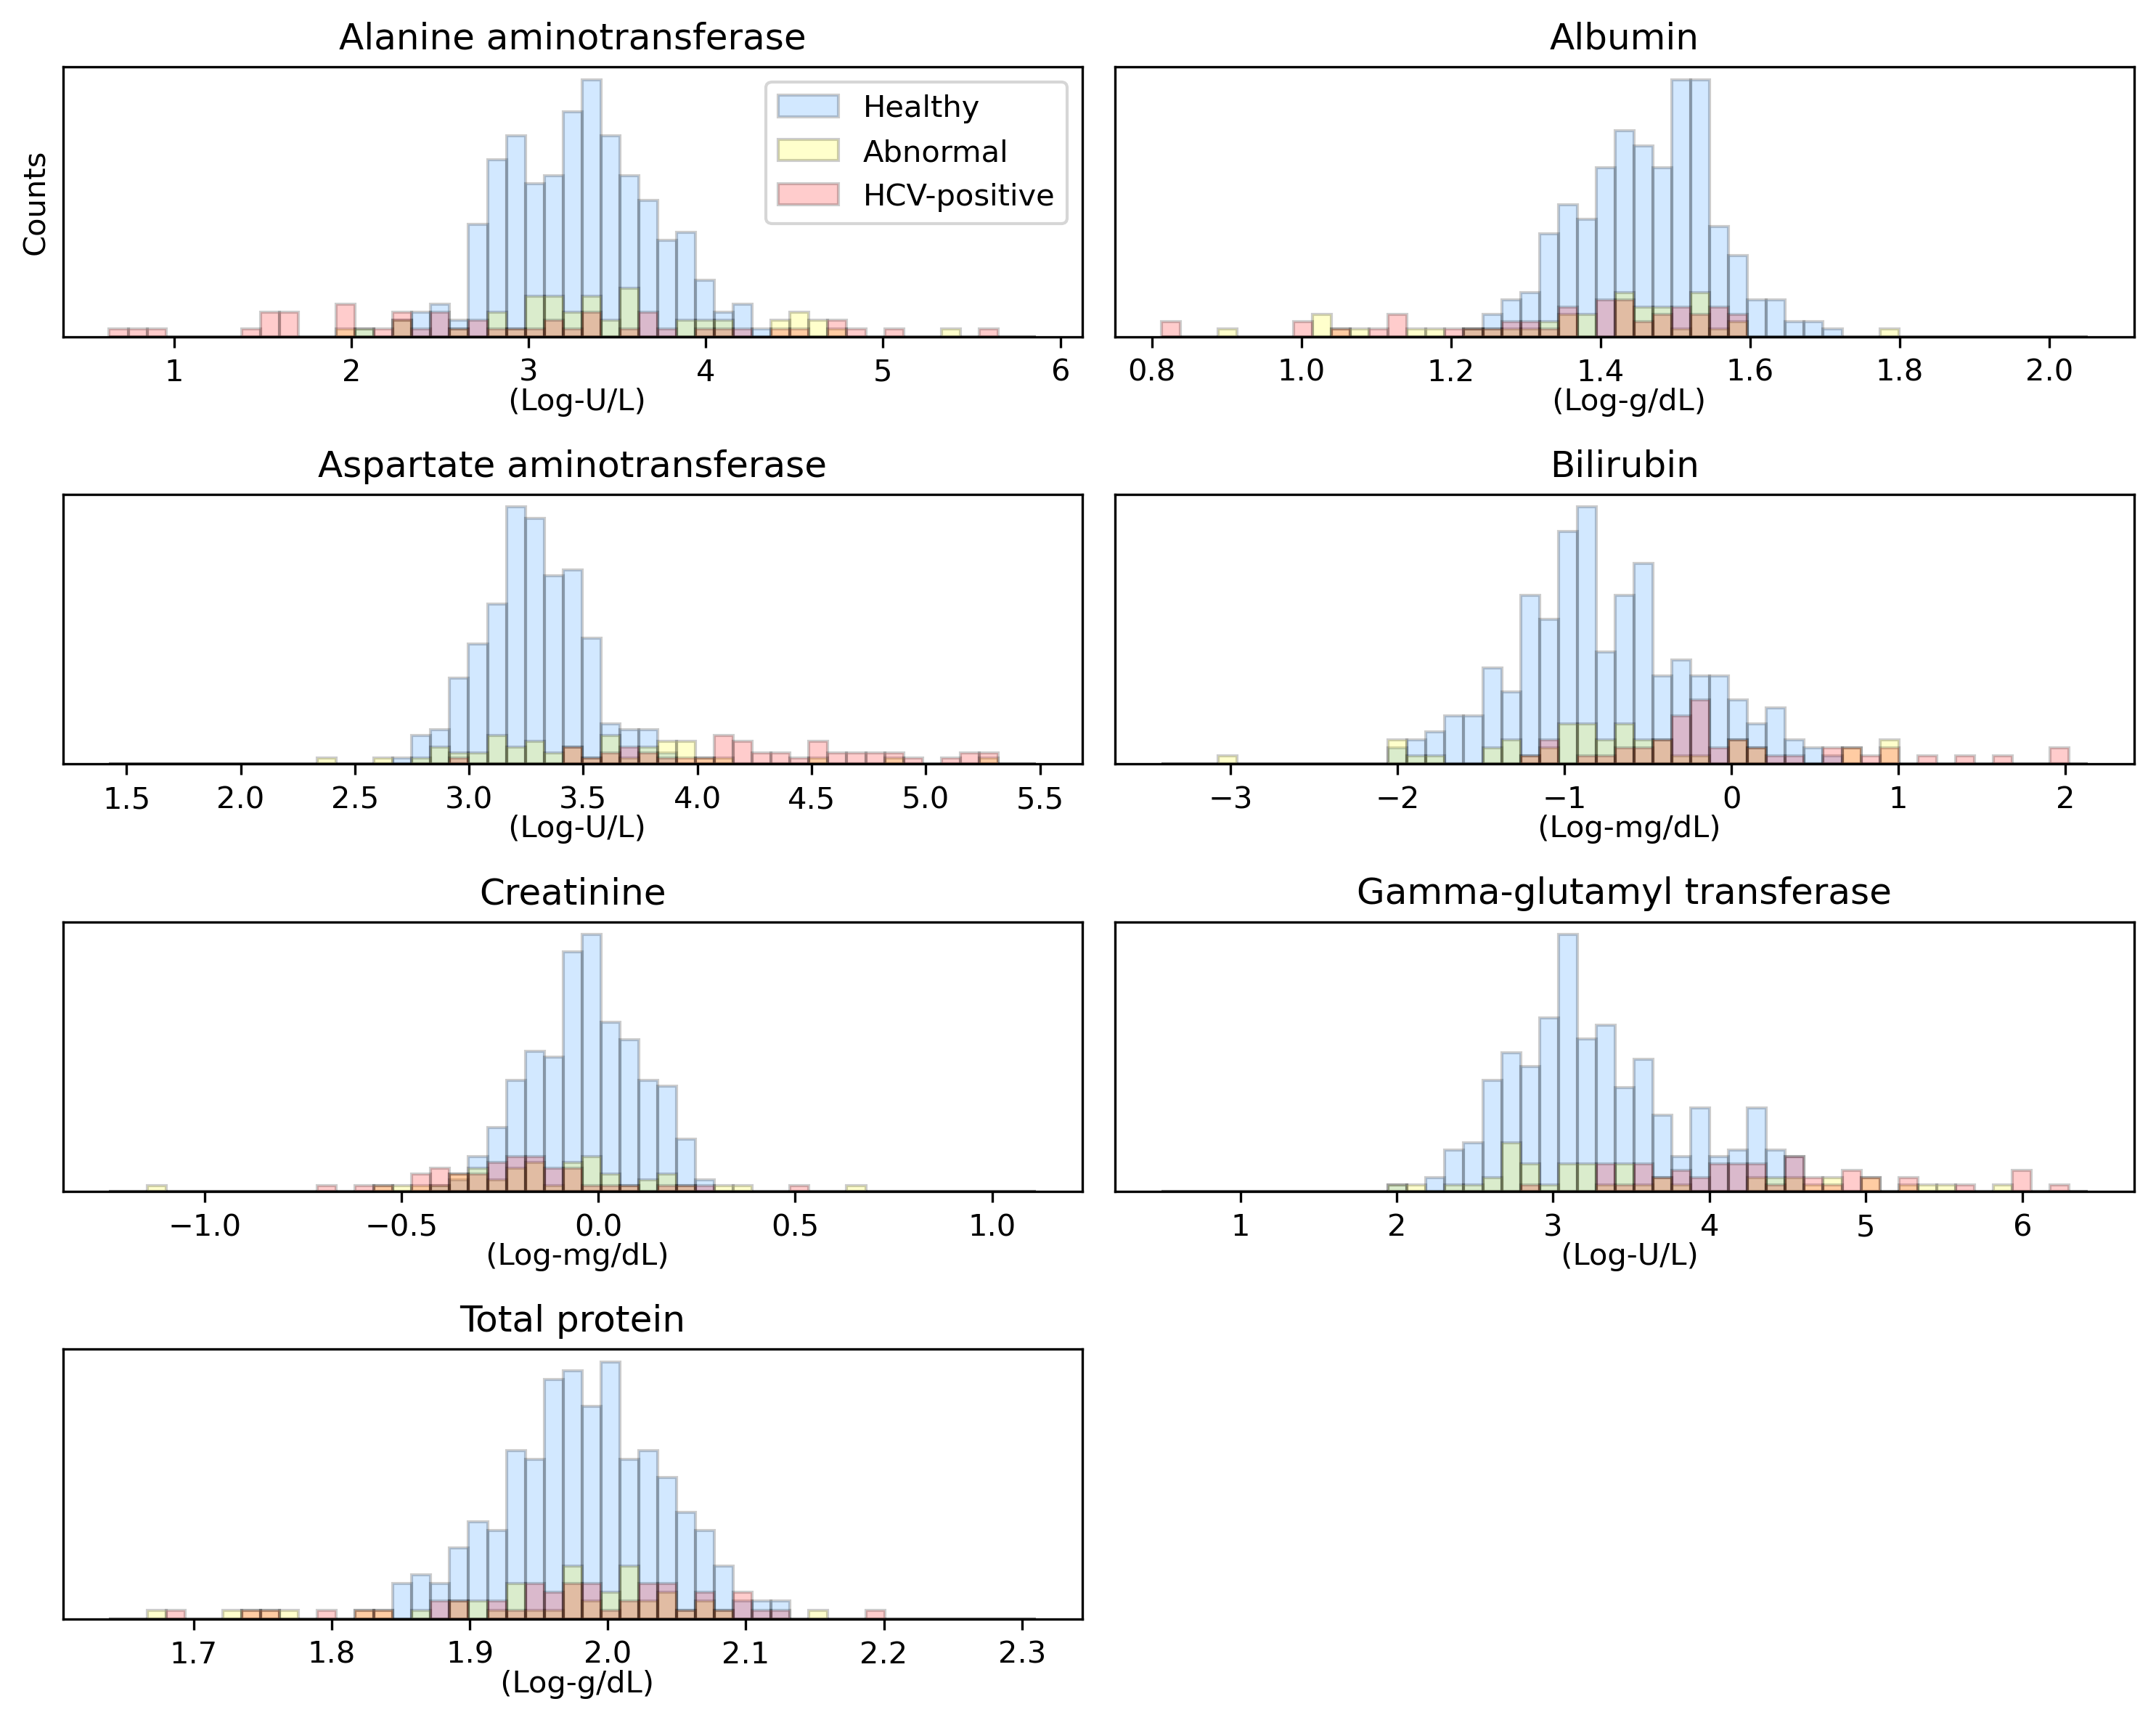

In [16]:
data_path = '../data/formatted/liver.csv'
df = pd.read_csv(data_path, index_col=0)
plot_distributions_and_ris(df, ris, gender='M', transform=True)
# plot_distributions_and_ris(df, ris, transform=True)
# plot_distributions_and_ris(df, ris, transform=True, outlier_removal=True)

